In [20]:
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

#데이터 로딩

(train_images, train_labels), (test_images, test_labels)=mnist.load_data()



In [21]:
# (샘플수, 가로, 세로)
train_images.shape

(60000, 28, 28)

In [22]:
train_labels.shape

(60000,)

In [23]:
# 케라스에서 처리할 수 있는 형태로 변환  샘플개수x가로x세로x채널(흑백 1, 컬러 3)
# reshape : 차원 변경
train_images=train_images.reshape((60000,28,28,1))

train_images=train_images.astype("float32") / 255

test_images=test_images.reshape((10000,28,28,1))

test_images=test_images.astype("float32") / 255

# 원 핫 인코딩 (to_categorical)

train_labels=to_categorical(train_labels)

test_labels=to_categorical(test_labels)

print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

# 모델 생성
model = Sequential()
# convolution layer, 필터 개수 32, 필터 크기 3x3
# 입력데이터 28x28x1 (흑백이미지1, 컬러이미지3)
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28, 28,1)))

# 맥스풀링 필터사이즈 2x2
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation="relu"))
# fully connected layer로 변환 (완전연결층)
model.add(Flatten())
model.add(Dense(64,activation="relu"))
# 출력층 10개의 숫자로 분류
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [25]:
# 모델학습
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1371 - accuracy: 0.9566
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0446 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0325 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0250 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0214 - accuracy: 0.9943


In [26]:
# 검증용 데이터로 모델의 성능 평가
test_loss, test_acc=model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9912


(0.03238680586218834, 0.9911999702453613)

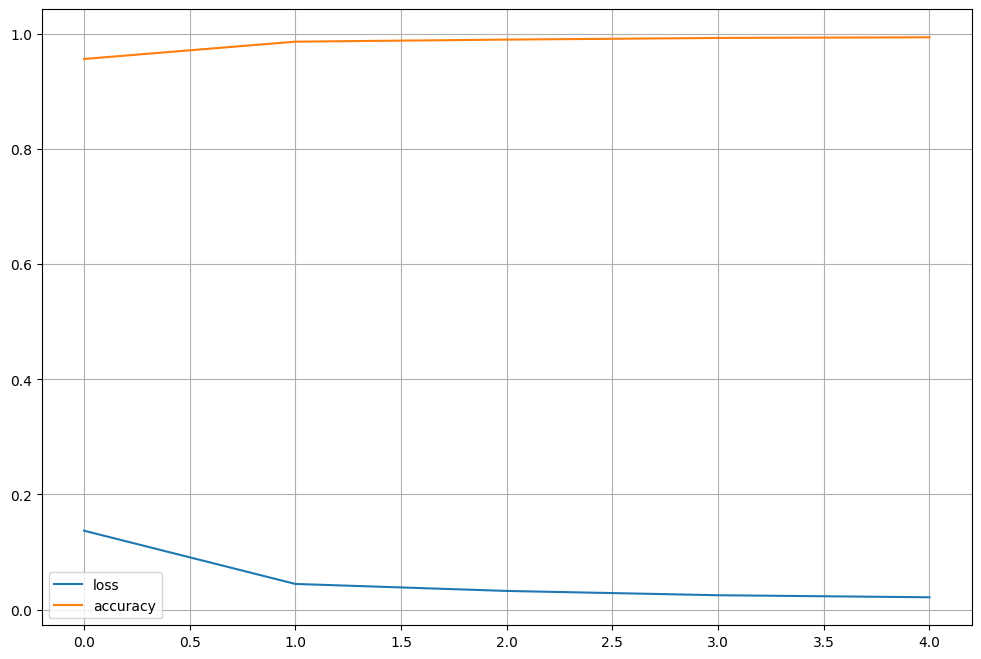

In [27]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [28]:
model.save("c:/data/mnis/mnis.h5")